<a href="https://colab.research.google.com/github/afeedsm/demo-repo/blob/main/Titanic_Machine_Learning_from_Disaster_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd

In [51]:
import matplotlib.pyplot as plt


In [52]:
trn=pd.read_csv('/content/train.csv')
tst=pd.read_csv('/content/test.csv')

In [53]:
trn.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
tst.shape

(418, 11)

In [55]:
trn.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [56]:
trn['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

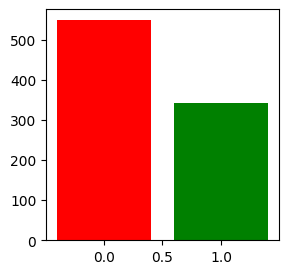

In [57]:
plt.figure(figsize=(3,3))
plt.bar(list(trn['Survived'].value_counts().keys()),list(trn['Survived'].value_counts()),color=['r','g'])
plt.show()

In [58]:

trn['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

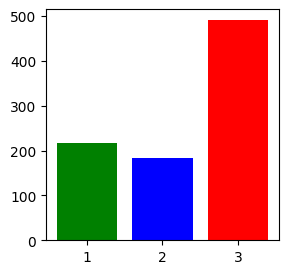

In [59]:
plt.figure(figsize=(3,3))
plt.bar(list(trn['Pclass'].value_counts().keys()),list(trn['Pclass'].value_counts()),color=['r','g','b'])
plt.show()

In [60]:
trn['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

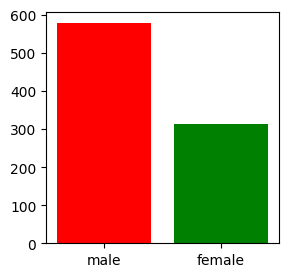

In [61]:
plt.figure(figsize=(3,3))
plt.bar(list(trn['Sex'].value_counts().keys()),list(trn['Sex'].value_counts()),color=['r','g'])
plt.show()

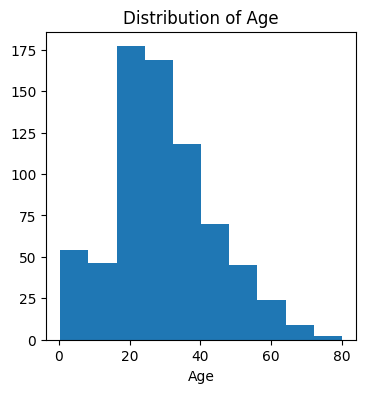

In [62]:
plt.figure(figsize=(4,4))
plt.hist(trn['Age'])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.show()

In [63]:
trn.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [64]:
X=trn.drop('Survived',axis=1)

In [65]:
y=trn['Survived']

In [66]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [67]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [68]:
numeric_features

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [69]:
categorical_features

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [70]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

In [71]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [72]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [73]:
model = RandomForestClassifier()

In [74]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', model)])

In [76]:
cv_scores = cross_val_score(pipeline, X, y, cv=5)

In [77]:
pipeline.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object'))])),
                ('classifier', RandomForestClassifier())])

In [78]:
pred=pipeline.predict(tst)